In [1]:
import numpy as np
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from matplotlib import pyplot as plt
import cv2
import supervision as sv

In [2]:

CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {DEVICE}")
MODEL_TYPE = "vit_h"


Device: cpu


In [3]:

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)

In [8]:
# Give the path of your image
image_path = './3c241c3a-c113-419d-9590-4ad1dbf03c74.jpg'
# Read the image from the path
image = cv2.imread(image_path)
# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [9]:
# Generate segmentation mask
output_mask = mask_generator.generate(image)


In [7]:
def show_output(result_dict,axes=None):
     if axes:
        ax = axes
     else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
     sorted_result = sorted(result_dict, key=(lambda x: x['area']),      reverse=True)
     # Plot for each segment area
     for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            ax.imshow(np.dstack((img, mask*0.5)))

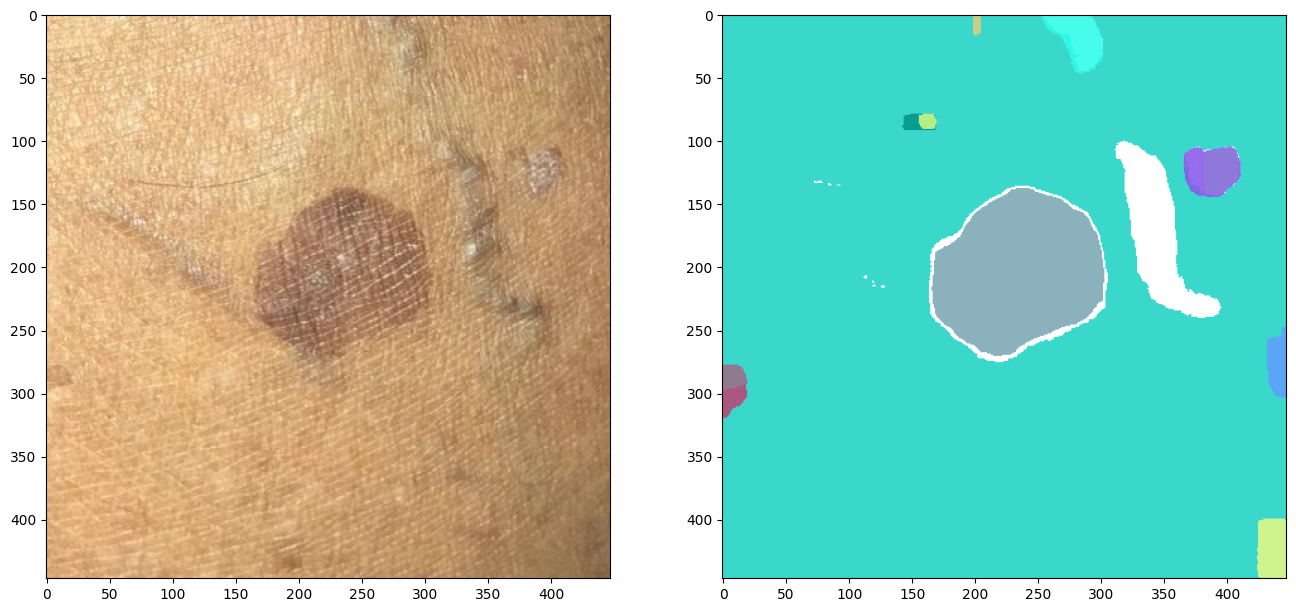

In [11]:
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(output_mask, axes[1])

In [8]:
#generate the mask for every image at /home/lorenzo/Desktop/ufes/TCC/pad/train/mask/melanoma, then save every image with the mask on at ./

import os 

path = '/home/lorenzo/Desktop/ufes/TCC/pad/train/data/melanoma'
path_result = "result"
os.makedirs(path_result, exist_ok=True)

for filename in os.listdir(path):
    image_path = path + '/' + filename
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    output_mask = mask_generator.generate(image)
    _,axes = plt.subplots(1,2, figsize=(16,16))
    axes[0].axis('off')
    axes[1].axis('off')
    axes[0].imshow(image_rgb)
    show_output(output_mask, axes[1])
    plt.savefig(os.path.join(path_result, filename))



In [30]:

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [32]:
predictor = SamPredictor(sam)


In [ ]:
predictor.set_image(image)
